<center>

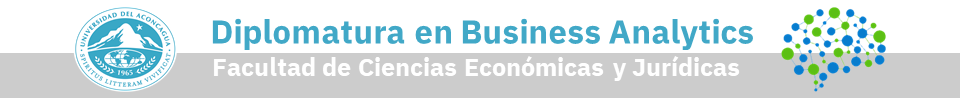

</center>

<center>
<font color="#41a8c7">
<h2><b>
Trabajo Final Módulo 10

</font>
</center>

~~~
Apellido y Nombre: Liquitay Alexandra Romina
~~~

**Instrucciones del Trabajo Final**

- Desarrollar los puntos necesarios para generar el modelo de regresión.
- Utilice PyCaret.
- Utilice un método de ensamble.
- Puede generar graficos en cualquier instancia del desarrollo.
- Al final del colab, generar una breve conclusión.

# **Carga de módulos y datos necesarios**

In [ ]:
import pandas as pd
import numpy as np

# **Creación del DataFrame**

In [ ]:
datos = "https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Modulo_10_Regresion/propiedades.csv"
df = pd.read_csv(datos)
df

,id,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,0,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,80.0,NaN,235000
1,1,Argentina,Capital Federal,Belgrano,NaN,NaN,1.0,NaN,40.0,105000
2,2,Argentina,Capital Federal,San Telmo,1.0,NaN,1.0,34.0,31.0,109183
3,3,Argentina,Capital Federal,Villa Urquiza,2.0,NaN,1.0,NaN,51.0,110000
4,4,Argentina,Capital Federal,Belgrano,6.0,4.0,2.0,190.0,178.0,550000
...,...,...,...,...,...,...,...,...,...,...
44673,44673,Argentina,Capital Federal,Monte Castro,2.0,1.0,1.0,56.0,54.0,115000
44674,44674,Argentina,Capital Federal,Barrio Norte,2.0,1.0,1.0,NaN,NaN,105000
44675,44675,Argentina,Capital Federal,Colegiales,2.0,1.0,1.0,45.0,40.0,99000
44676,44676,Argentina,Capital Federal,Colegiales,1.0,1.0,1.0,59.0,59.0,105000


- l1 - país
- l2 - provincia o ciudad
- l3 - barrio
- rooms - cantidad de habitaciones
- bedrooms - cantidad de dormitorios
- bathrooms - cantidad de baños
- surface_total - superficie total
- surface_covered - superficie cubierta
- price - precio

# **Generación del modelo de regresión**

##Análisis Exploratorio

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44678 entries, 0 to 44677
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               44678 non-null  int64  
 1   l1               44678 non-null  object 
 2   l2               44678 non-null  object 
 3   l3               44382 non-null  object 
 4   rooms            43547 non-null  float64
 5   bedrooms         38623 non-null  float64
 6   bathrooms        43371 non-null  float64
 7   surface_total    39856 non-null  float64
 8   surface_covered  40641 non-null  float64
 9   price            44678 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 3.4+ MB


##Eliminar las variables que no son relevantes

In [ ]:
df.drop(columns=["id","l1","l2"], inplace=True) #elimina Id, País y Provincia


##Renombrar columnas

In [ ]:
df = df.rename(columns={
    'l3':'barrio',
    'rooms':'habitaciones',
    'bedrooms':'dormitorios',
    'bathrooms':'baños',
    'surface_total':'superficie_total',
    'surface_covered':'superficie_cubierta',
    'price':'precio'
    })

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44678 entries, 0 to 44677
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   barrio               44382 non-null  object 
 1   habitaciones         43547 non-null  float64
 2   dormitorios          38623 non-null  float64
 3   baños                43371 non-null  float64
 4   superficie_total     39856 non-null  float64
 5   superficie_cubierta  40641 non-null  float64
 6   precio               44678 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.4+ MB


##Convertir datos categóricos en datos numéricos

In [ ]:
df = pd.get_dummies(df, drop_first = True )

##Identificar datos faltantes y definir tratamiento

In [ ]:
df.isnull().sum().sort_values(ascending=False) #sumar los nulos y ordenar de forma ascendente

dormitorios                 6055
superficie_total            4822
superficie_cubierta         4037
baños                       1307
habitaciones                1131
                            ... 
barrio_Parque Patricios        0
barrio_Parque Chas             0
barrio_Parque Chacabuco        0
barrio_Parque Centenario       0
barrio_Once                    0
Length: 62, dtype: int64

In [ ]:
df.dropna(how='any', axis=0, inplace = True) #elimino todas las filas que tienen un dato faltante

In [ ]:
df.isnull().sum().sort_values(ascending = False)

barrio_Villa del Parque     0
barrio_Catalinas            0
barrio_Monte Castro         0
barrio_Monserrat            0
barrio_Mataderos            0
                           ..
barrio_Parque Patricios     0
barrio_Parque Chas          0
barrio_Parque Chacabuco     0
barrio_Parque Centenario    0
habitaciones                0
Length: 62, dtype: int64

##Instalación PyCaret

In [ ]:
!pip install pycaret

##Habilitación Google Colab

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


##División Conjunto de Datos

In [ ]:
data = df.sample(frac=0.8, random_state=123)
data_no_vistos = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_no_vistos.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_no_vistos.shape))

Data for Modeling: (26120, 62)
Unseen Data For Predictions (6530, 62)


##Configuración Entorno PyCaret

In [ ]:
import pycaret.regression as pycr

In [ ]:
regresion = pycr.setup(data = data, 
                  target = "precio", 
                  session_id=123, 
                 )

,Description,Value
0,session_id,123
1,Target,precio
2,Original Data,"(26120, 62)"
3,Missing Values,False
4,Numeric Features,61
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(18283, 61)"


##Modelo

In [ ]:
mejor_modelo_01 = pycr.compare_models(n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,57711.5441,3.475574e+10,173260.5734,0.8241,0.2506,0.1852,7.168
lightgbm,Light Gradient Boosting Machine,68019.6070,3.625723e+10,177828.3969,0.8165,0.2687,0.2180,0.204
gbr,Gradient Boosting Regressor,72274.7997,3.765816e+10,182419.2470,0.8082,0.2865,0.2388,1.776
rf,Random Forest Regressor,59961.3237,4.009643e+10,184456.4061,0.7867,0.2511,0.1942,7.166
ridge,Ridge Regression,94900.6458,4.862941e+10,211555.4557,0.7464,0.5766,0.3495,0.030
llar,Lasso Least Angle Regression,94767.8508,4.861728e+10,211527.3913,0.7464,0.5718,0.3482,0.040
br,Bayesian Ridge,94677.1498,4.861424e+10,211529.5616,0.7464,0.5712,0.3468,0.103
lr,Linear Regression,94930.8264,4.863750e+10,211572.4891,0.7463,0.5801,0.3498,0.320
lasso,Lasso Regression,94918.1734,4.863367e+10,211564.0871,0.7463,0.5773,0.3497,0.299
omp,Orthogonal Matching Pursuit,95833.8965,4.895577e+10,212335.5086,0.7445,0.5076,0.3478,0.033


In [ ]:
mejor_modelo_01

[ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False),
 LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.

##Configuración del entorno PyCaret con Normalización y Transformación

In [ ]:
regresion = pycr.setup(data = df, 
                  target = "precio", 
                  session_id=123, 
                  normalize = True,
                  transformation = True,
                  log_experiment = True, 
                  experiment_name = "reg")

,Description,Value
0,session_id,123
1,Target,precio
2,Original Data,"(32650, 62)"
3,Missing Values,False
4,Numeric Features,61
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(22854, 61)"


In [ ]:
mejor_modelo02 = pycr.compare_models(n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,53672.8345,2.060125e+10,142251.2812,0.8729,0.2417,0.1768,9.262
rf,Random Forest Regressor,55902.1098,2.088025e+10,143357.4572,0.8711,0.2381,0.1826,9.084
lightgbm,Light Gradient Boosting Machine,65672.5986,2.481341e+10,156164.2902,0.8475,0.2571,0.2111,0.204
gbr,Gradient Boosting Regressor,71414.1748,2.647700e+10,161569.0923,0.8367,0.2837,0.2386,2.232
knn,K Neighbors Regressor,67972.9176,3.130218e+10,175913.1737,0.8073,0.2566,0.2008,0.766
dt,Decision Tree Regressor,64298.0775,3.363540e+10,182371.4736,0.7905,0.2848,0.2052,0.173
ada,AdaBoost Regressor,133524.6999,6.065202e+10,245246.5685,0.6180,0.4938,0.5488,1.122
lasso,Lasso Regression,146608.2754,7.735587e+10,276664.0690,0.5254,0.8405,0.6449,0.340
ridge,Ridge Regression,146597.1778,7.735320e+10,276659.3107,0.5254,0.8431,0.6448,0.044
br,Bayesian Ridge,146521.1249,7.734916e+10,276649.9192,0.5254,0.8435,0.6435,0.132


##Ensamble: Blending

In [ ]:
blender_02 = blend_models(estimator_list = [
                                            mejor_modelo02[0], 
                                            mejor_modelo02[1], 
                                            mejor_modelo02[2],
                                            mejor_modelo02[3],
                                            mejor_modelo02[4]])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,57715.0941,3.387020e+10,184038.5916,0.8052,0.2413,0.1873
1,59341.6267,2.236289e+10,149542.2691,0.8937,0.2305,0.1837
2,58586.7164,2.106538e+10,145139.1826,0.8803,0.2326,0.1853
3,60664.2460,2.579327e+10,160602.8355,0.8575,0.2335,0.1883
4,57825.9168,1.554296e+10,124671.4104,0.8823,0.2425,0.1910
5,54384.1311,1.509836e+10,122875.3749,0.8934,0.2320,0.1832
6,55206.4476,1.383132e+10,117606.6243,0.8913,0.2293,0.1854
7,58866.1037,1.934456e+10,139084.7066,0.8798,0.2242,0.1775
8,61947.0407,2.467577e+10,157085.2299,0.8528,0.2397,0.1923
9,57605.5337,1.674251e+10,129392.8654,0.8859,0.2423,0.2043


##Predicción

In [ ]:
predict_model(blender_02, data=data)

,habitaciones,dormitorios,baños,superficie_total,superficie_cubierta,precio,barrio_Agronomía,barrio_Almagro,barrio_Balvanera,barrio_Barracas,barrio_Barrio Norte,barrio_Belgrano,barrio_Boca,barrio_Boedo,barrio_Caballito,barrio_Catalinas,barrio_Centro / Microcentro,barrio_Chacarita,barrio_Coghlan,barrio_Colegiales,barrio_Congreso,barrio_Constitución,barrio_Flores,barrio_Floresta,barrio_Las Cañitas,barrio_Liniers,barrio_Mataderos,barrio_Monserrat,barrio_Monte Castro,barrio_Nuñez,barrio_Once,barrio_Palermo,barrio_Parque Avellaneda,barrio_Parque Centenario,barrio_Parque Chacabuco,barrio_Parque Chas,barrio_Parque Patricios,barrio_Paternal,barrio_Pompeya,barrio_Puerto Madero,barrio_Recoleta,barrio_Retiro,barrio_Saavedra,barrio_San Cristobal,barrio_San Nicolás,barrio_San Telmo,barrio_Tribunales,barrio_Velez Sarsfield,barrio_Versalles,barrio_Villa Crespo,barrio_Villa Devoto,barrio_Villa General Mitre,barrio_Villa Lugano,barrio_Villa Luro,barrio_Villa Ortuzar,barrio_Villa Pueyrredón,barrio_Villa Real,barrio_Villa Riachuelo,barrio_Villa Santa Rita,barrio_Villa Soldati,barrio_Villa Urquiza,barrio_Villa del Parque,Label
0,3.0,2.0,3.0,127.0,127.0,630000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,583097.929040
1,1.0,1.0,1.0,40.0,40.0,140000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84066.764663
2,3.0,2.0,2.0,90.0,60.0,225000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,211999.970657
3,4.0,3.0,1.0,124.0,120.0,330000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,353270.176354
4,4.0,3.0,2.0,111.0,104.0,299000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,305540.019172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26115,4.0,3.0,1.0,85.0,75.0,140000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,163062.361280
26116,5.0,3.0,2.0,136.0,93.0,319000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,292921.407060
26117,5.0,2.0,1.0,102.0,102.0,350000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,328714.334445
26118,4.0,3.0,3.0,163.0,140.0,580001,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,574732.274008


In [67]:
prediccion = predict_model(blender_02, data=data)
prediccion[['habitaciones','dormitorios','baños','precio','Label']]

,habitaciones,dormitorios,baños,precio,Label
0,3.0,2.0,3.0,630000,583097.929040
1,1.0,1.0,1.0,140000,84066.764663
2,3.0,2.0,2.0,225000,211999.970657
3,4.0,3.0,1.0,330000,353270.176354
4,4.0,3.0,2.0,299000,305540.019172
...,...,...,...,...,...
26115,4.0,3.0,1.0,140000,163062.361280
26116,5.0,3.0,2.0,319000,292921.407060
26117,5.0,2.0,1.0,350000,328714.334445
26118,4.0,3.0,3.0,580001,574732.274008


##Predicción sobre datos no vistos

In [69]:
prediccion_02 = predict_model(blender_02, data=data_no_vistos)
prediccion_02[['habitaciones','dormitorios','baños','precio','Label']]

,habitaciones,dormitorios,baños,precio,Label
0,3.0,2.0,3.0,1600000,1.351197e+06
1,2.0,1.0,1.0,110000,1.268902e+05
2,4.0,3.0,1.0,398000,4.239819e+05
3,2.0,1.0,1.0,135000,1.390575e+05
4,1.0,1.0,1.0,75000,8.492183e+04
...,...,...,...,...,...
6525,2.0,1.0,1.0,155000,1.483679e+05
6526,1.0,1.0,1.0,54000,6.784989e+04
6527,2.0,1.0,1.0,115000,1.221577e+05
6528,1.0,1.0,1.0,105000,1.366147e+05


##Gráfico

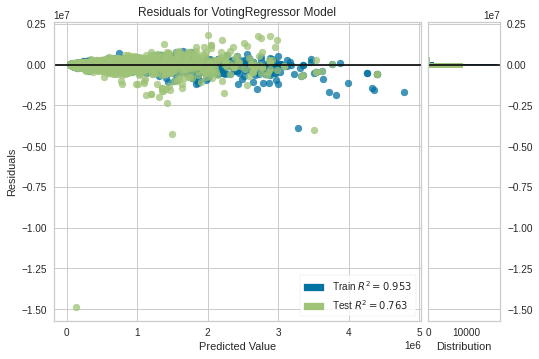

In [ ]:
plot_model(blender_02)

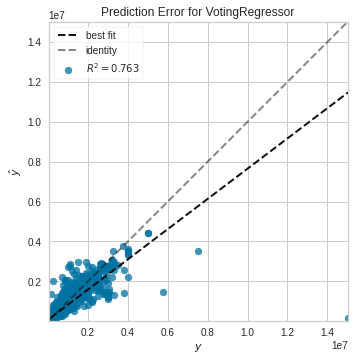

In [72]:
plot_model(blender_02, plot = 'error')

# **Conclusiones**

En el presente trabajo se utilizó PyCaret para crear un modelo de regresión.



1.   Se crea el dataframe con Pandas
2.   Análisis exploratorio de Datos: se analiza el tipo de datos, el tamaño del dataframe, se identifca la variable objetivo y el vector de entrada.
3.   Producto del paso anterior, se decide eliminar los datos faltantes, y se codifican las variables categóricas y se divide el conjunto de datos en dos grupos: Vistos y No Vistos. Dentro del primer grupo, se divide en datos para el Train y datos para el Test.
4.   Se configura el entorno PyCaret y determina cual es el mejor modelo según el R2. Se obtienen los siguientes resultados:
El mejor modelo es 'et' con un R2 de 0.8241, pero dentro de los 5 mejores modelos, el que tiene menor tiempo de ejecución es el 'lightgbm', con un R2 de 0.8165
5.   Con Normalización y Transformación, se intenta mejorar el R2 obtenido en el paso anterior. Se obtiene nuevamente como mejor modelo a 'et', con un R2 de 0.8729, pero con un tiempo de ejecución muy alto en comparación del modelo 'lightgbm', que tiene un R2 de 0.8475.
6.   En un intento de mejorar aún más la performance del modelo, se aplica Ensamble BLENDING, mejorando aún más el R2: 0.8722
7.   Gráfico: del gráfico se observa que el R2 de entrenamiento y el de prueba son diferentes, esto da un indicio que la variable objetivo no es tan independiente.

